In [1]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
#opening data
import os
import pathlib
import warnings
#used for plots
from mplsoccer import Pitch
from scipy.stats import binned_statistic_2d

In [2]:
df1 = pd.read_csv("../event/Generated_data/index_sorted_eventcsv.csv")

In [3]:
import ast  

df_pass = df1[df1['type'] == 'Pass']
df_pass['location'] = df_pass['location'].apply(ast.literal_eval)
df_pass['pass_end_location'] = df_pass['pass_end_location'].apply(ast.literal_eval)
df_pass['x_start'] = df_pass['location'].apply(lambda x: x[0])
df_pass['y_start'] = df_pass['location'].apply(lambda x: x[1])
df_pass['x_end'] = df_pass['pass_end_location'].apply(lambda x: x[0])
df_pass['y_end'] = df_pass['pass_end_location'].apply(lambda x: x[1])

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/1255546577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['location'] = df_pass['location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/1255546577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pass['pass_end_location'] = df_pass['pass_end_location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/1255546577.py:6: SettingWithCopyWarning: 

In [4]:
df_carry = df1[df1['type'] == 'Carry']
df_carry['location'] = df_carry['location'].apply(ast.literal_eval)
df_carry['carry_end_location'] = df_carry['carry_end_location'].apply(ast.literal_eval)
df_carry['x_start'] = df_carry['location'].apply(lambda x: x[0])
df_carry['y_start'] = df_carry['location'].apply(lambda x: x[1])
df_carry['x_end'] = df_carry['carry_end_location'].apply(lambda x: x[0])
df_carry['y_end'] = df_carry['carry_end_location'].apply(lambda x: x[1])

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/3623361675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carry['location'] = df_carry['location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/3623361675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carry['carry_end_location'] = df_carry['carry_end_location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/3623361675.py:4: SettingWithCopyWar

In [5]:
move_df = pd.concat([df_pass, df_carry]).sort_values(by='index')
move_df.head()

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,...,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start,x_end,y_end
4,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:00:00.578,Pass,NaN,f651a6c4-55e3-4e0f-a178-59414ba83d6a,"[8.98496759714251, 80.0, 41.4622037211361, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",61.0,40.1,48.0,43.2
6,2389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[49.7, 43.6]",NaN,...,00:00:01.554,Carry,NaN,9707e590-1d55-4d25-a50f-475019356152,"[8.74654439366353, 80.0, 40.9967310870193, 0.0...","[{'teammate': True, 'actor': False, 'keeper': ...",48.0,43.2,49.7,43.6
7,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:00:02.724,Pass,NaN,a5956ecc-d637-44d2-8705-e2079e12013e,"[10.227276315524, 80.0, 41.5155332886657, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ...",49.7,43.6,96.0,1.8
9,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,00:00:16.423,Pass,NaN,5ba6dfab-49f0-4225-bbb6-8b1e27bc729a,"[13.2232254880239, 80.0, 0.0, 65.4802459369524...","[{'teammate': True, 'actor': False, 'keeper': ...",22.7,80.0,36.0,75.2
12,2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[35.4, 75.4]",NaN,...,00:00:17.546,Carry,True,a511000a-bb39-4888-80e5-d81cabf8819e,"[19.2281251109993, 80.0, 0.0, 55.8025055084597...","[{'teammate': True, 'actor': False, 'keeper': ...",36.0,75.2,35.4,75.4


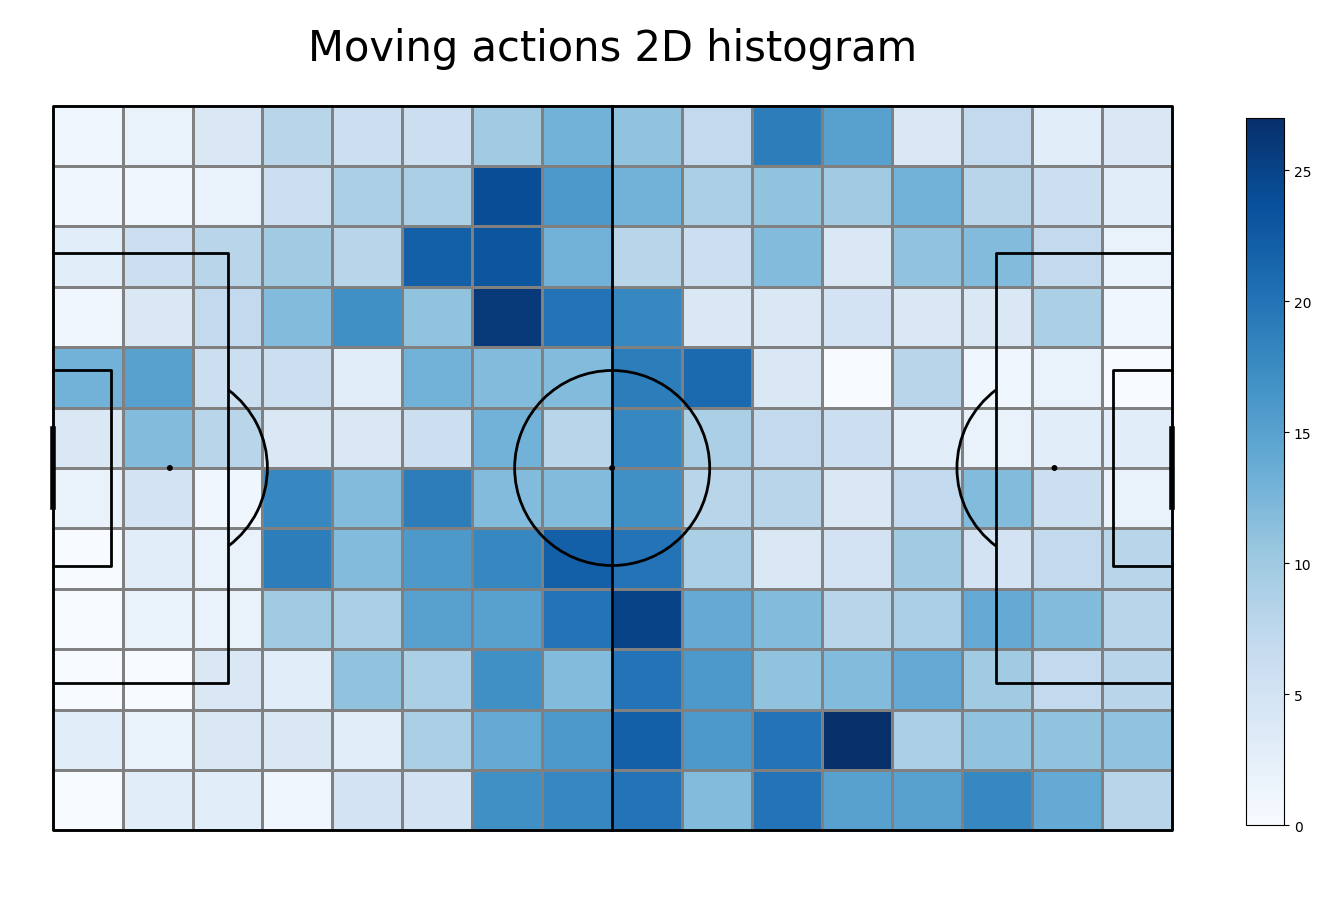

In [6]:
#create 2D histogram of these
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
move = pitch.bin_statistic(move_df.x_start, move_df.y_start, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Moving actions 2D histogram', fontsize = 30)
plt.show()
#get the array
move_count = move["statistic"]

In [7]:
df_shot = df1[df1['type'] == 'Shot']
df_shot['location'] = df_shot['location'].apply(ast.literal_eval)
df_shot['x_start'] = df_shot['location'].apply(lambda x: x[0])
df_shot['y_start'] = df_shot['location'].apply(lambda x: x[1])

df_shot

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/3179307053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['location'] = df_shot['location'].apply(ast.literal_eval)
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/3179307053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot['x_start'] = df_shot['location'].apply(lambda x: x[0])
/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/3179307053.py:4: SettingWithCopyWarning: 
A value is trying to

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,...,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start
191,4207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:04:40.798,Shot,NaN,545c2c84-018f-4570-a01c-753823feaeac,"[99.5492448455322, 74.7074998664235, 74.772720...","[{'teammate': True, 'actor': False, 'keeper': ...",92.4,30.0
339,4208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:07:36.537,Shot,NaN,4ad26294-8aaf-4d69-83dd-bbf9ef797b32,"[105.370767959093, 69.7882277064759, 83.865645...","[{'teammate': False, 'actor': False, 'keeper':...",99.2,47.9
601,4209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:16:15.886,Shot,NaN,6d498191-05f0-432c-8764-03aea4ef9fb8,"[104.792045881529, 72.1498267439925, 82.410662...","[{'teammate': False, 'actor': False, 'keeper':...",103.1,34.6
770,4210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:22:24.114,Shot,NaN,6d527ebc-a948-4cd8-ac82-daced35bb715,"[111.070465748821, 60.325199711525, 95.8903862...","[{'teammate': False, 'actor': False, 'keeper':...",108.0,40.0
978,4211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:31:35.181,Shot,NaN,f227a92e-d86c-4f3d-aa75-5ccb71adcae6,"[97.4832338300461, 69.381332866913, 75.0504429...","[{'teammate': False, 'actor': False, 'keeper':...",94.3,23.5
1177,4212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:35:22.647,Shot,NaN,ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,"[105.861497067258, 71.3506966325977, 86.423993...","[{'teammate': True, 'actor': False, 'keeper': ...",111.8,32.1
1915,4213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:03:49.971,Shot,NaN,13a4889d-ad08-41be-9125-24c4c7d7879a,"[100.194925970331, 80.0, 80.899821665927, 20.6...","[{'teammate': True, 'actor': False, 'keeper': ...",103.3,52.3
2203,4214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:13:21.380,Shot,NaN,43691970-1dad-4e11-bd29-48f640c55ea1,"[111.066608745049, 80.0, 86.1550836919431, 19....","[{'teammate': False, 'actor': False, 'keeper':...",110.5,24.9
2234,4215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:14:51.755,Shot,NaN,9615ffbc-b513-45e6-9ccc-015234483f95,"[107.377346367598, 80.0, 83.6607344377479, 18....","[{'teammate': True, 'actor': False, 'keeper': ...",109.7,46.0
2516,4216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,France,771,00:22:15.084,Shot,True,9f6285ff-9b32-4a46-a4a0-74c1ca89276c,"[103.534198634963, 71.0263178518626, 82.175305...","[{'teammate': True, 'actor': False, 'keeper': ...",113.4,34.6


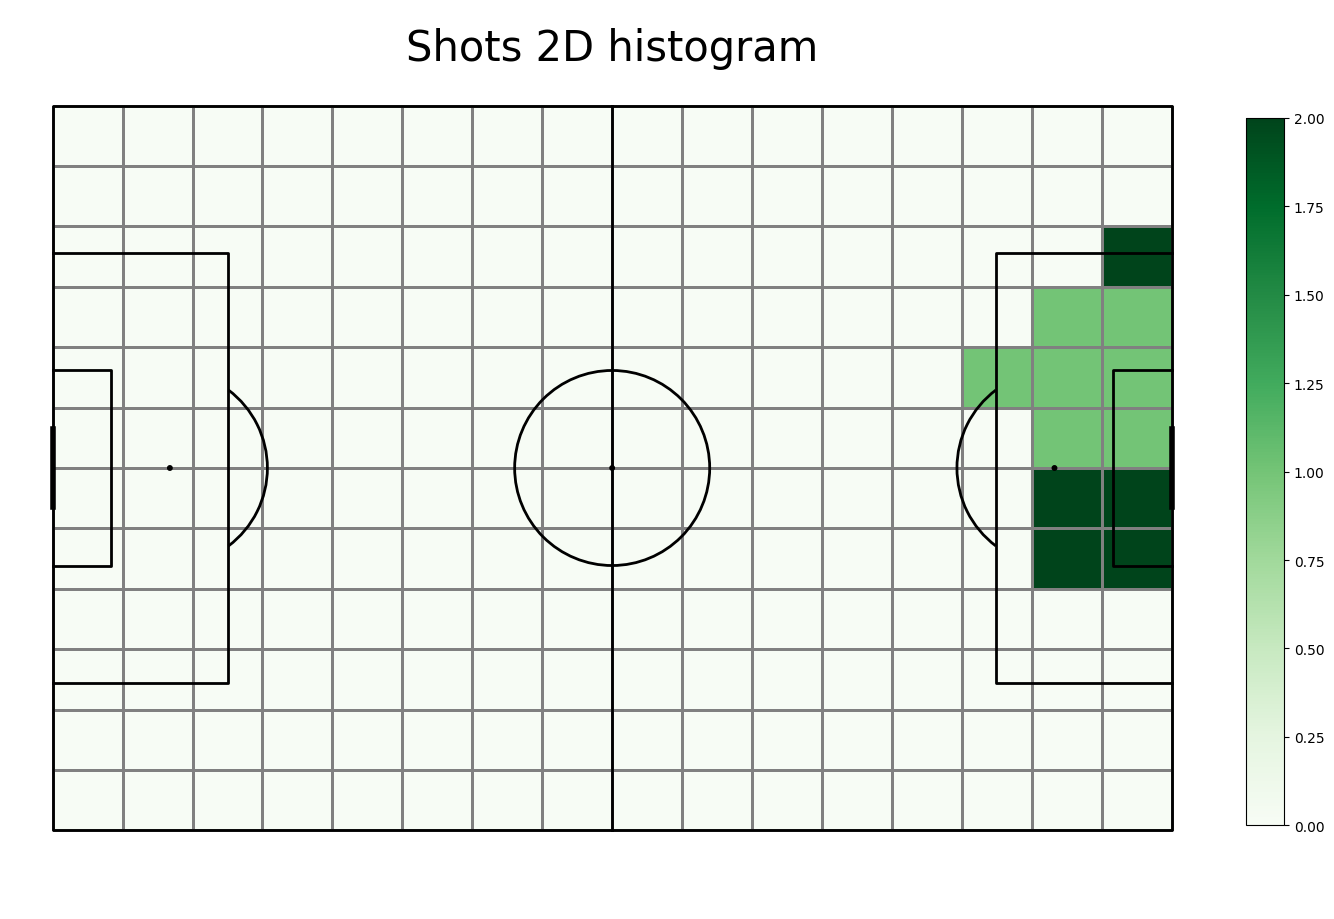

In [8]:
#create 2D histogram of these
shot = pitch.bin_statistic(df_shot.x_start, df_shot.y_start, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shots 2D histogram', fontsize = 30)
plt.show()

shot_count = shot["statistic"]

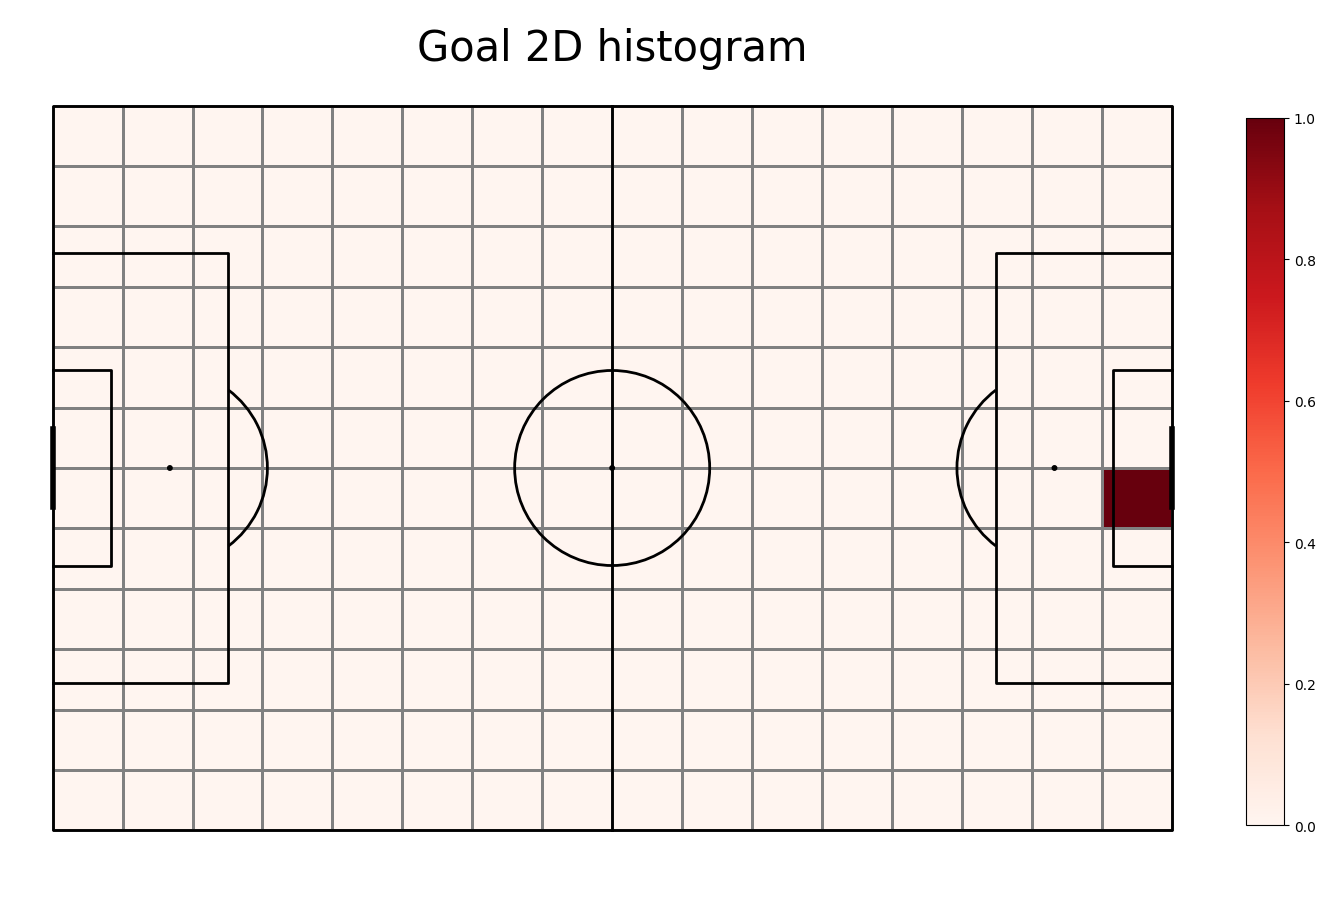

In [9]:
goal_df = df_shot[df_shot['shot_outcome'] == 'Goal']
goal = pitch.bin_statistic(goal_df.x_start, goal_df.y_start, statistic='count', bins=(16, 12), normalize=False)
goal_count = goal["statistic"]

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal 2D histogram', fontsize = 30)
plt.show()

In [10]:
goal_df

,Unnamed: 0,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,...,team,team_id,timestamp,type,under_pressure,event_uuid,visible_area,freeze_frame,x_start,y_start
770,4210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:22:24.114,Shot,NaN,6d527ebc-a948-4cd8-ac82-daced35bb715,"[111.070465748821, 60.325199711525, 95.8903862...","[{'teammate': False, 'actor': False, 'keeper':...",108.0,40.0
1177,4212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:35:22.647,Shot,NaN,ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,"[105.861497067258, 71.3506966325977, 86.423993...","[{'teammate': True, 'actor': False, 'keeper': ...",111.8,32.1
2927,4219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,France,771,00:34:24.975,Shot,NaN,6cc0d5e2-6999-4006-8a7a-34de4cbe3ffd,"[111.040679999615, 61.2180691486706, 94.960792...","[{'teammate': True, 'actor': False, 'keeper': ...",108.0,40.0
2986,4220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,France,771,00:35:59.025,Shot,NaN,03fb2918-e1e7-4ec8-89ff-7bc5531e853d,"[103.353210982717, 74.4449113428643, 80.176313...","[{'teammate': False, 'actor': False, 'keeper':...",104.8,30.1
4069,4232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:02:58.079,Shot,NaN,54b889ec-6026-49ea-a913-e883dbe6e301,"[110.219537445822, 80.0, 88.3971769069031, 24....","[{'teammate': True, 'actor': False, 'keeper': ...",116.6,43.0
4202,4234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,France,771,00:12:05.189,Shot,NaN,d9b92dbd-4fea-4f48-b2fb-d7222eab2dbd,"[110.856817541161, 61.2421309867409, 95.263925...","[{'teammate': False, 'actor': False, 'keeper':...",108.0,40.0
4388,4237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,France,771,00:00:13.386,Shot,NaN,NaN,NaN,NaN,108.1,40.1
4390,4238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:01:02.191,Shot,NaN,2a15edb5-2a54-41d5-afe9-87e447389b18,"[66.1581810682948, 80.0, 67.7315913968988, 8.3...","[{'teammate': True, 'actor': True, 'keeper': F...",108.1,40.1
4394,4240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:02:27.184,Shot,NaN,50dcde1a-faa3-4eec-a0cd-3f09a7cf763a,"[71.7859219296227, 80.0, 72.1109742638867, 8.9...","[{'teammate': True, 'actor': True, 'keeper': F...",108.1,40.1
4398,4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Argentina,779,00:04:16.722,Shot,NaN,bcc6d4ae-f71c-4566-bf2d-c12f910eb526,"[6.0830318986702, 80.0, 35.2414826693926, 9.61...","[{'teammate': True, 'actor': True, 'keeper': F...",108.1,40.1


In [11]:
goal_df[['player','minute','second']]

,player,minute,second
770,Lionel Andrés Messi Cuccittini,22,24
1177,Ángel Fabián Di María Hernández,35,22
2927,Kylian Mbappé Lottin,79,24
2986,Kylian Mbappé Lottin,80,59
4069,Lionel Andrés Messi Cuccittini,107,58
4202,Kylian Mbappé Lottin,117,5
4388,Kylian Mbappé Lottin,120,13
4390,Lionel Andrés Messi Cuccittini,121,2
4394,Paulo Bruno Exequiel Dybala,122,27
4398,Leandro Daniel Paredes,124,16


In [12]:
goal_count

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/2503385224.py:1: RuntimeWarning: invalid value encountered in divide
  move_probability = move_count/(move_count+shot_count)


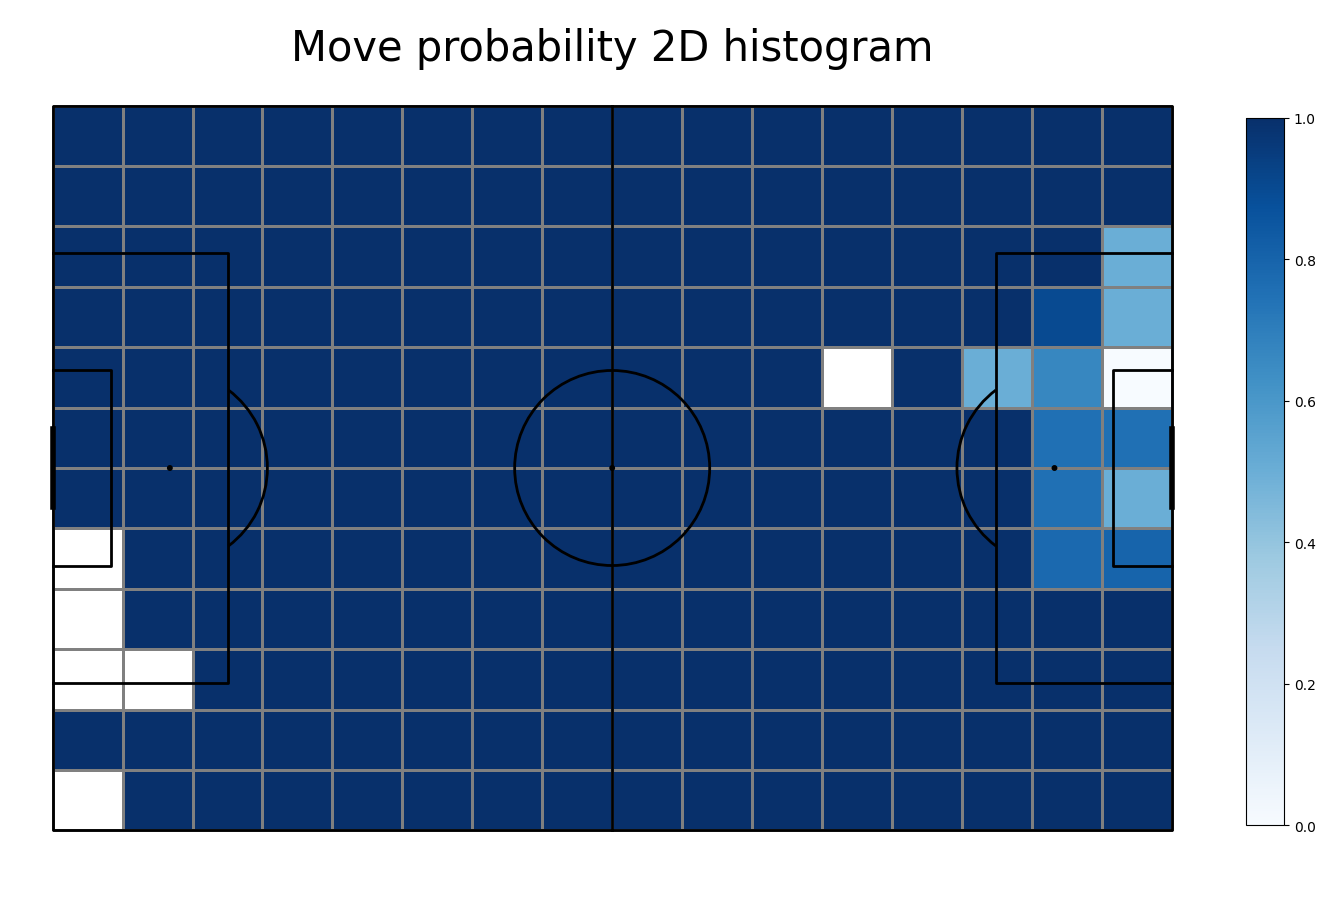

In [13]:
move_probability = move_count/(move_count+shot_count)
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
move["statistic"] = move_probability
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Move probability 2D histogram', fontsize = 30)
plt.show()

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/282033905.py:1: RuntimeWarning: invalid value encountered in divide
  shot_probability = shot_count/(move_count+shot_count)


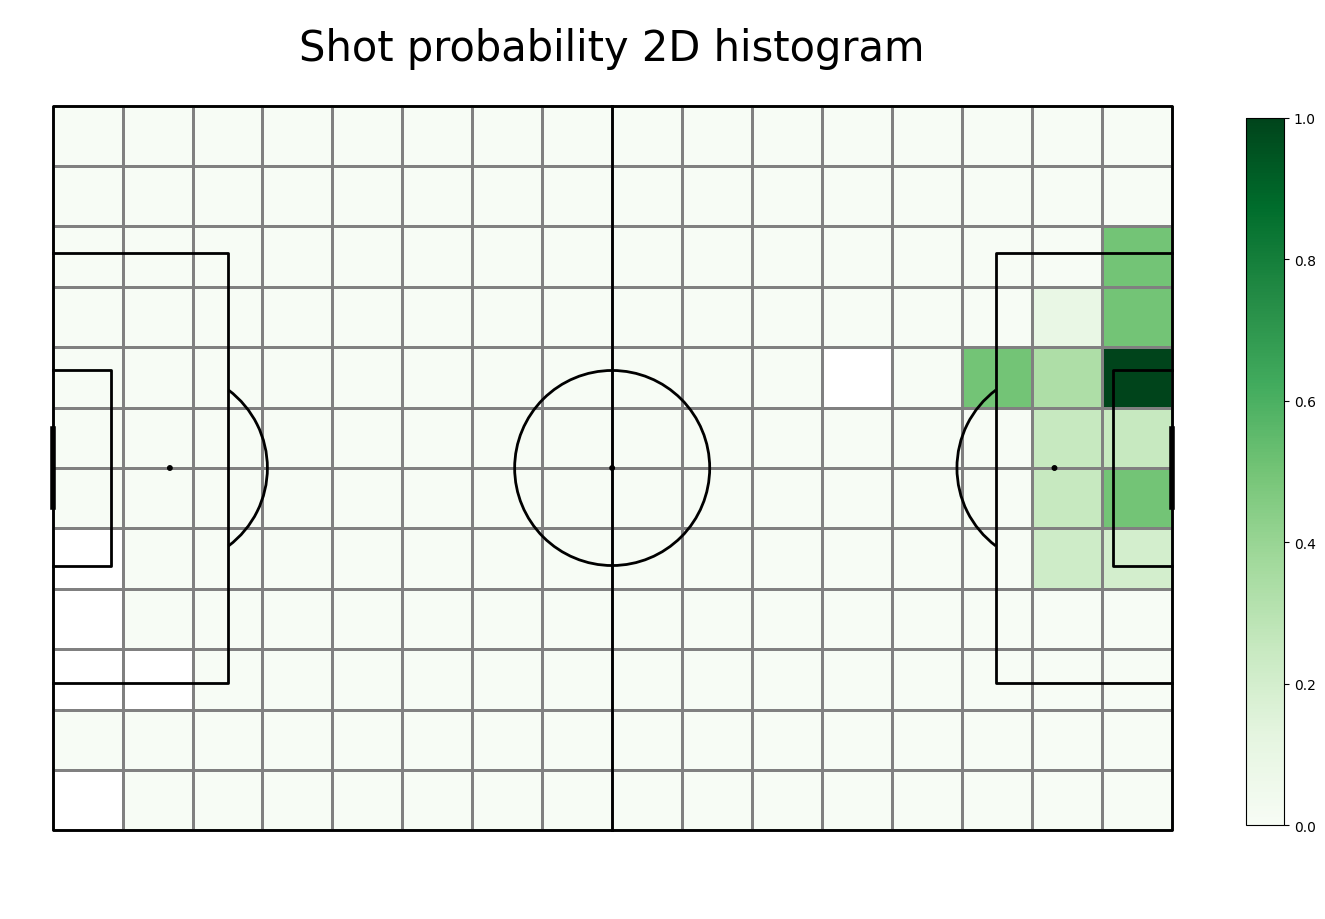

In [14]:
shot_probability = shot_count/(move_count+shot_count)
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
shot["statistic"] = shot_probability
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot probability 2D histogram', fontsize = 30)
plt.show()

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_38205/1173137835.py:1: RuntimeWarning: invalid value encountered in divide
  goal_probability = goal_count/shot_count


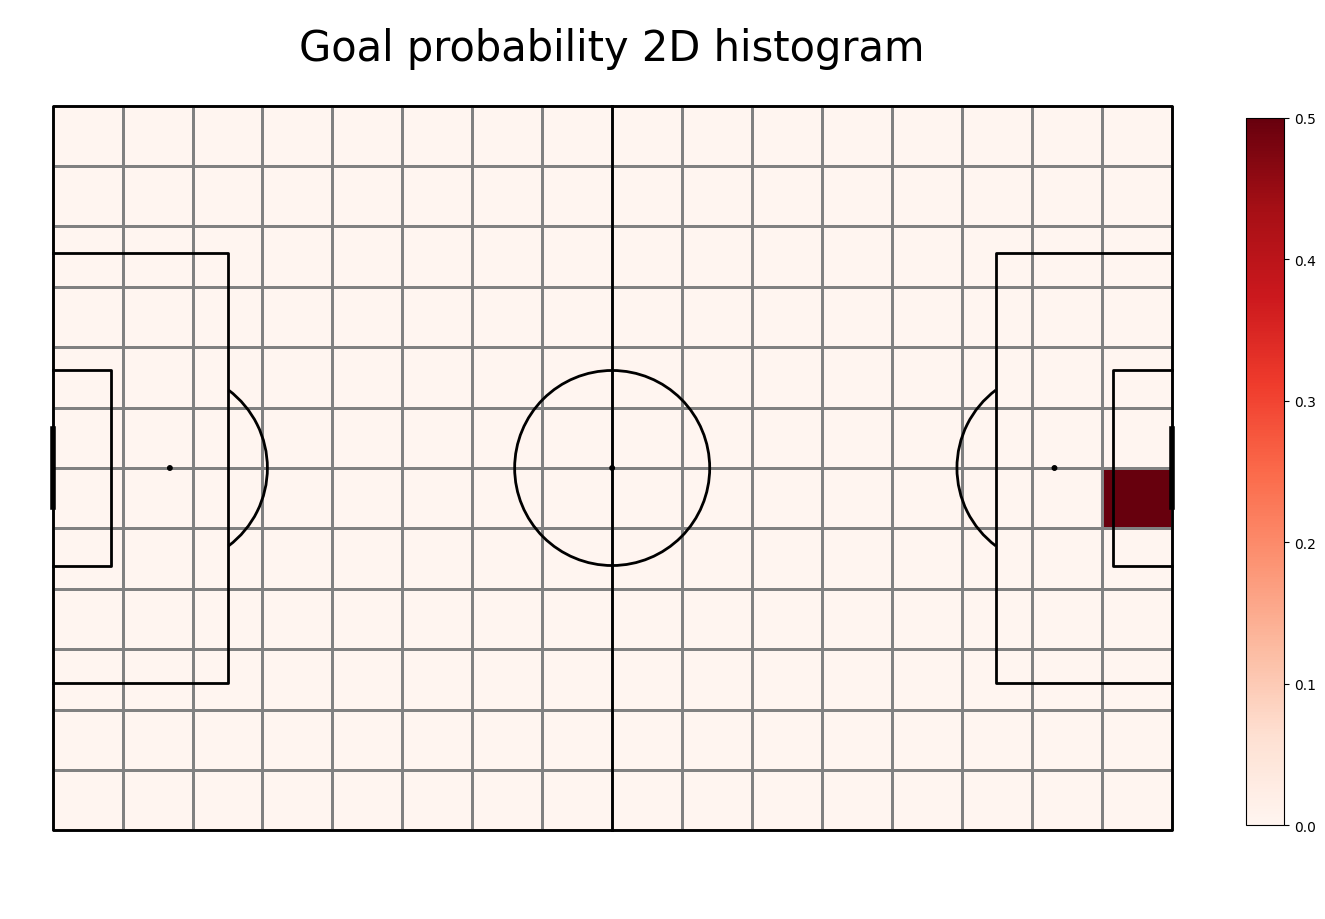

In [15]:
goal_probability = goal_count/shot_count
goal_probability[np.isnan(goal_probability)] = 0
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
goal["statistic"] = goal_probability
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal probability 2D histogram', fontsize = 30)
plt.show()

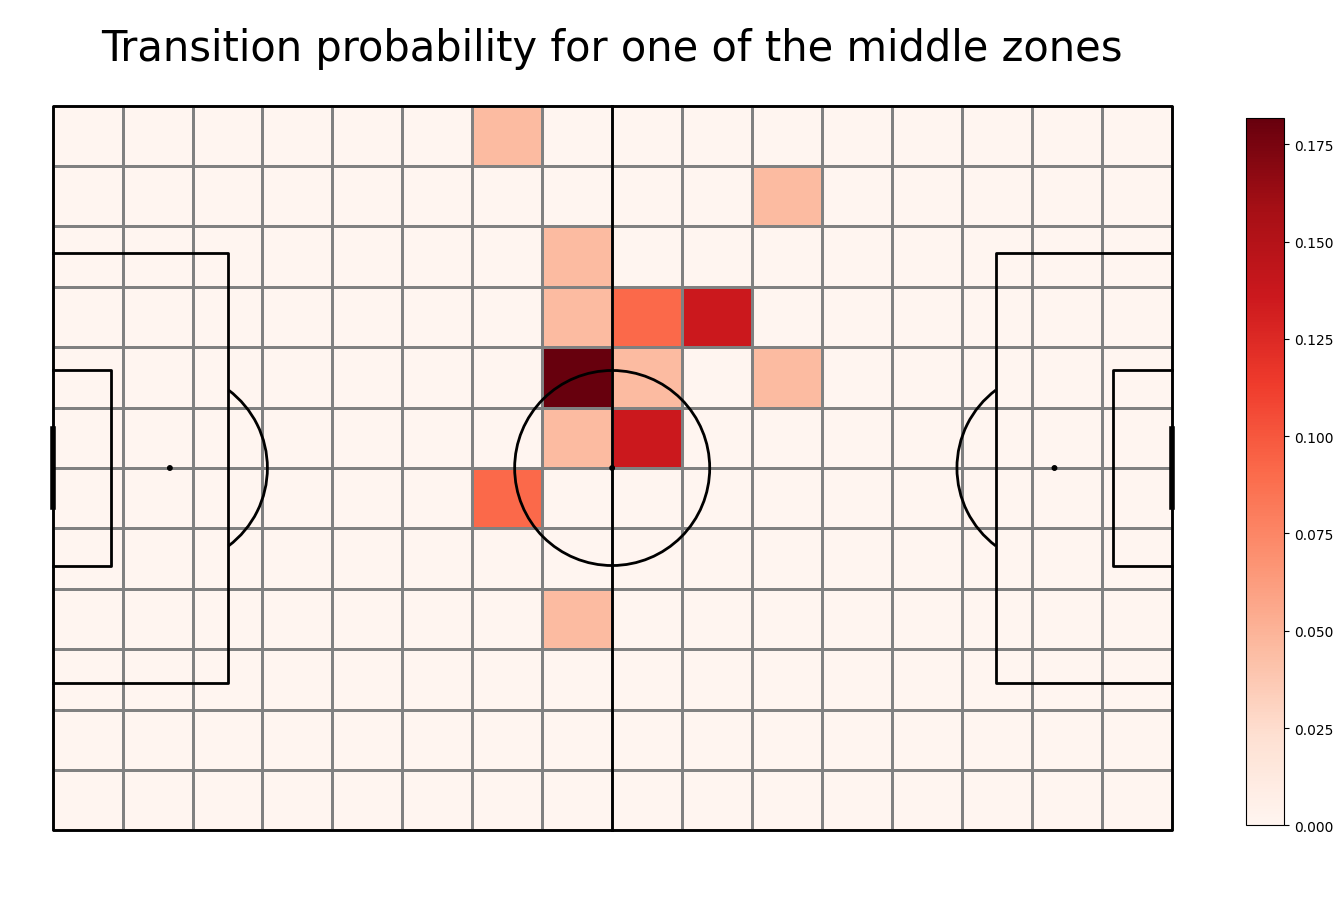

In [53]:
# Function to convert bin numbers to tuples
def get_bin_tuple(x, y):
    bin_numbers = binned_statistic_2d(np.ravel(x), np.ravel(y), 
                                      values=None, statistic="count", 
                                      bins=(16, 12), range=[[0, 105], [0, 68]], 
                                      expand_binnumbers=True)[3]
    return tuple([int(i) for i in bin_numbers])

# Adding start and end sectors
move_df["start_sector"] = move_df.apply(lambda row: get_bin_tuple(row.x_start, row.y_start), axis=1)
move_df["end_sector"] = move_df.apply(lambda row: get_bin_tuple(row.x_end, row.y_end), axis=1)

# Group by start sector and count occurrences
df_count_starts = move_df.groupby("start_sector").size().reset_index(name='count_starts')

# Initialize list for transition matrices
transition_matrices = []

# Create transition matrices
for i, row in df_count_starts.iterrows():
    start_sector = row['start_sector']
    count_starts = row['count_starts']
    
    # Get all events that started in this sector
    this_sector = move_df.loc[move_df["start_sector"] == start_sector]
    
    # Group by end sector and count occurrences
    df_cound_ends = this_sector.groupby(["end_sector"]).size().reset_index(name='count_ends')
    
    # Initialize the transition matrix for this start sector
    T_matrix = np.zeros((12, 16))
    
    # Populate the transition matrix
    for j, row2 in df_cound_ends.iterrows():
        end_sector = row2["end_sector"]
        value = row2["count_ends"]
        # Convert 1-based index to 0-based index
        row_idx = end_sector[1] - 1
        col_idx = end_sector[0] - 1
        # Ensure indices are within bounds
        if 0 <= row_idx < 12 and 0 <= col_idx < 16:
            T_matrix[row_idx][col_idx] = value
    
    # Normalize the transition matrix
    T_matrix = T_matrix / count_starts
    
    # Append the transition matrix to the list
    transition_matrices.append(T_matrix)

#let's plot it for the zone [1,1] - left down corner
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Change the index here to change the zone.
goal["statistic"] = transition_matrices[90]
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Transition probability for one of the middle zones', fontsize = 30)
plt.show()

ValueError: x and y must be the same size

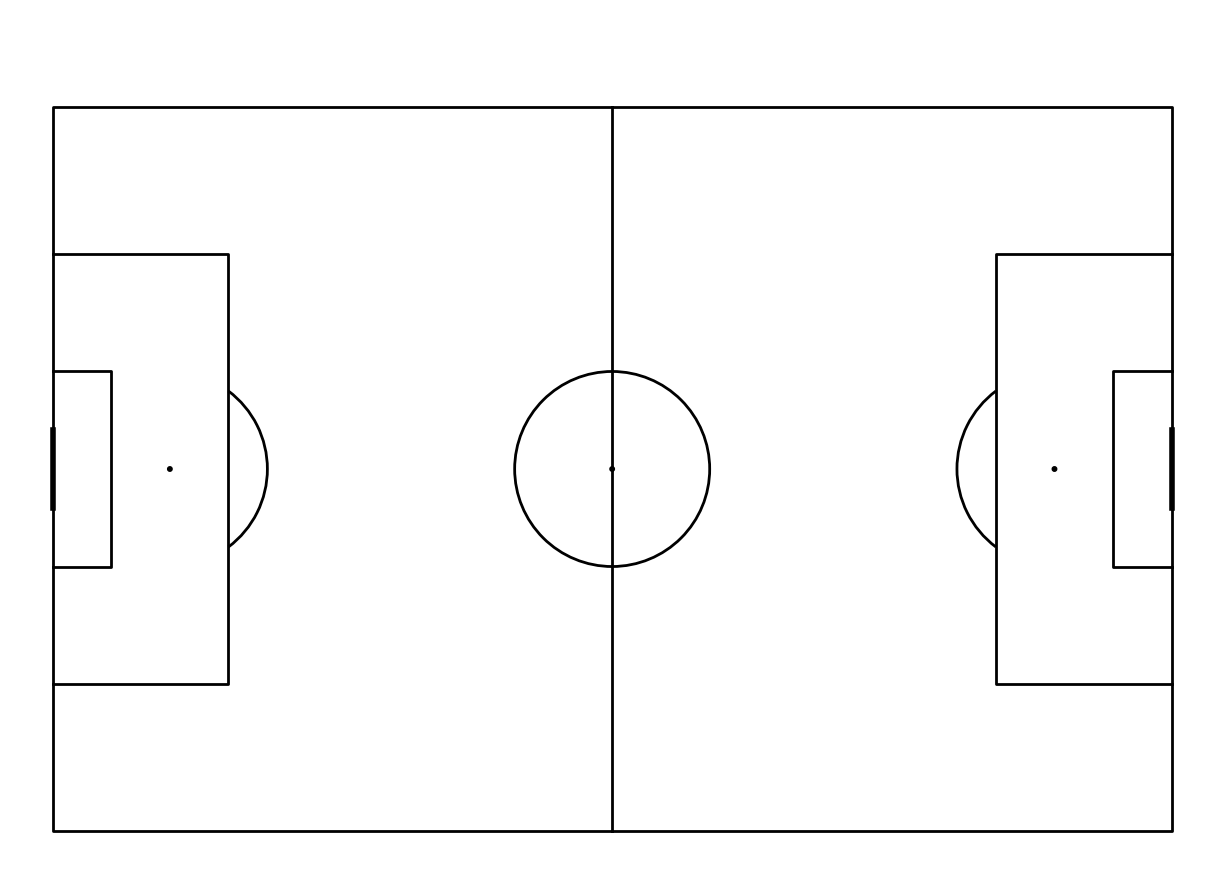

In [59]:
# Create a sample transition_matrices list for demonstration purposes
# Replace this with your actual transition matrices data
transition_matrices = [np.random.rand(12, 16) for _ in range(5)]  # Example data

# Convert transition matrices list to numpy array
transition_matrices_array = np.array(transition_matrices)

# Initialize xT matrix
xT = np.zeros((12, 16))

# Iteratively calculate xT
for i in range(5):
    shoot_expected_payoff = goal_probability * shot_probability
    move_expected_payoff = move_probability * np.sum(transition_matrices_array * xT, axis=0)
    xT = shoot_expected_payoff + move_expected_payoff

    # Plot the xT matrix
    pitch = Pitch(line_color='black', pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder=2)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.01, title_space=0, endnote_space=0)
    
    # Create x and y positions that match the heatmap bins
    x_positions = np.linspace(0, 105, 16)
    y_positions = np.linspace(0, 68, 12)

    # Create a bin_statistic object with the xT values
    xT_statistic = pitch.bin_statistic(x=x_positions, y=y_positions, values=xT.flatten(), statistic='sum', bins=(16, 12), normalize=False)

    pcm = pitch.heatmap(xT_statistic, cmap='Oranges', edgecolor='grey', ax=ax['pitch'])
    labels = pitch.label_heatmap(xT_statistic, color='blue', fontsize=9,
                                 ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder=3)
    
    # Add colorbar to the plot
    ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
    cbar = plt.colorbar(pcm, cax=ax_cbar)
    txt = 'Expected Threat matrix after ' + str(i+1) + ' moves'
    fig.suptitle(txt, fontsize=30)
    plt.show()

In [48]:
T_matrix = np.zeros((12, 16))
T_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

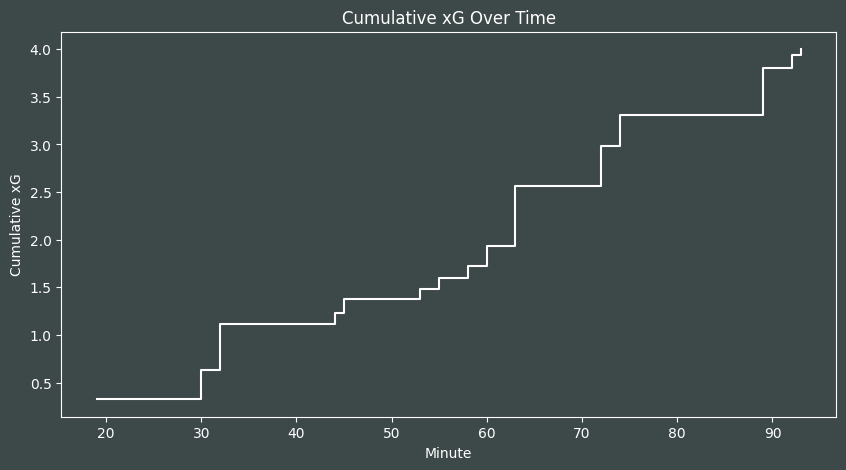

In [62]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings
from statsbombpy import sb 
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

a = sb.events(match_id=18244)
a = a[['team','type','minute','location','shot_end_location','shot_outcome']]
shots= a[((a['team']=='Real Madrid')&(a['type']=='Shot'))].reset_index()
# Extract shot coordinates and convert to standard pitch coordinates
shots["X"] = shots["location"].apply(lambda loc: (120 - loc[0]) * 105 / 120)
shots["Y"] = shots["location"].apply(lambda loc: loc[1] * 68 / 100)
shots["C"] = shots["location"].apply(lambda loc: abs(loc[1] - 60) * 68 / 100)

# Calculate distance from goal
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)

# Calculate angle to goal
shots["Angle"] = np.where(
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) > 0,
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)),
    np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32 / 2)**2)) + np.pi
)

# Determine if the shot was a goal
shots["Goal"] = shots["shot_outcome"].apply(lambda outcome: 1 if outcome == 'Goal' else 0).astype(object)


#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance']
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots,
                           family=sm.families.Binomial()).fit()
#print summary
# print(test_model.summary())
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum))
   return xG

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1)
shots = shots.assign(xG=xG)

#Create a 2D map of xG
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + abs(y-68/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-68/2)
        sh['C2'] = (y-68/2)**2

        pgoal_2d[x,y] =  calculate_xG(sh)

# Calculate the cumulative sum of the 'xG' column
shots['cumulative_xG'] = shots['xG'].cumsum()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_facecolor("#3d4849")
ax.patch.set_facecolor("#3d4849")

# Plot cumulative xG using a step plot
ax.step(x=shots['minute'], y=shots['cumulative_xG'], where='post', color='white')

# Customize the plot appearance
plt.xticks(color='white')
plt.yticks(color='white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set labels and title
ax.set_xlabel('Minute', color='white')
ax.set_ylabel('Cumulative xG', color='white')
ax.set_title('Cumulative xG Over Time', color='white')

# Show the plot
plt.show()